In [1]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [2]:
df = pd.read_csv('Data/Preprocessed_TJ_new.csv')

In [3]:
df.head()

,Unnamed: 0,created_at,favorite_count,full_text,id_str,lang,location,quote_count,reply_count,retweet_count,username,keyword
0,0,Fri Jun 21 11:50:28 +0000 2024,0,gaasik nih pluit gadatang dah menit nunggu wid...,1804119693726486727,in,"Tangerang, Banten",0,0,0,totaeba_,Transjakarta
1,1,Fri Jun 21 11:43:35 +0000 2024,0,hallo sebernya penarikan dana tap in tap out s...,1804117959805395101,in,"Jakarta, Indonesia",0,1,0,haloakubecca,Transjakarta
2,2,Fri Jun 21 11:32:13 +0000 2024,1,halo halte pondok indah fasilitas duduk lansia...,1804115099902448074,in,NaN,0,1,1,JeaKelana,Transjakarta
3,3,Fri Jun 21 11:31:48 +0000 2024,1,udahnya kartu tap tulisannya reset tap in lift...,1804114994088583643,in,NaN,0,1,0,kokumble,Transjakarta
4,4,Fri Jun 21 11:30:00 +0000 2024,1,kokkkkk tj gabisa ditrack gmaps lagiiiiii,1804114544505294903,in,NaN,0,0,0,fadillahasya,Transjakarta


In [4]:
df.head()
df = df.dropna()
tweets = df['full_text']

In [5]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(tweets)

In [6]:
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_sum = tfidf_df.sum().sort_values(ascending=False)
print(tfidf_sum.head(30))

halte           12.941759
rute            10.283744
jam              9.986469
tj               8.612256
bus              7.957818
gimana           6.919999
halo             6.794131
arah             6.723631
koridor          6.208507
pagi             5.836934
nya              5.022642
udah             4.981657
nunggu           4.885788
rutenya          4.774321
busway           4.593841
sih              4.464115
beroperasi       4.462969
menit            4.348109
cawang           4.277026
tap              4.013967
jakarta          3.977255
banget           3.926832
stasiun          3.645589
transjakarta     3.595941
nih              3.566722
gbk              3.491349
tolong           3.399291
brp              3.351791
manggarai        3.236682
malam            3.201097
dtype: float64


c:\Users\Yoga Duet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Yoga Duet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Yoga Duet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Yoga Duet\AppData\Local\Programs\Python\Python310\lib\site-packa

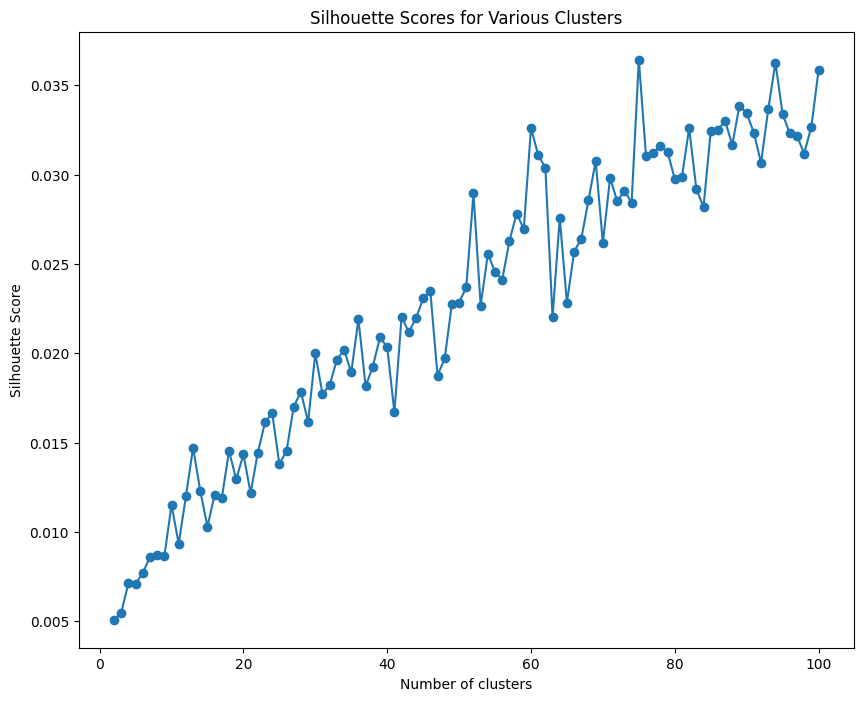

Best number of clusters based on Silhouette Score: 75


In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score

# Elbow Method
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, random_state=42)
#     kmeans.fit(X)
#     wcss.append(kmeans.inertia_)

# plt.figure(figsize=(10, 8))
# plt.plot(range(1, 11), wcss, marker='o')
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

# Silhouette Method
silhouette_scores = []
for i in range(2, 101):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, cluster_labels))

plt.figure(figsize=(10, 8))
plt.plot(range(2, 101), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Print best number of clusters based on Silhouette Score
best_num_clusters = np.argmax(silhouette_scores) + 2  # +2 because range starts from 2
print(f'Best number of clusters based on Silhouette Score: {best_num_clusters}')

In [7]:
# Clustering using K-Means
num_clusters = 8  # Anda bisa menyesuaikan jumlah cluster
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

KMeans(random_state=42)

In [8]:
df['cluster'] = kmeans.labels_

In [9]:
# Print out the top terms per cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :20]:  # Top 10 terms per cluster
        print(f' {terms[ind]}')
    print("\n")

Cluster 0:
 halte
 bus
 pagi
 tolong
 udah
 nanya
 beroperasi
 penumpang
 jalur
 jalan
 transjakarta
 tracking
 stop
 busway
 anak
 dimana
 nih
 terdekat
 pasar
 kota


Cluster 1:
 tj
 rutenya
 halo
 stasiun
 lotte
 kemana
 cibubur
 banget
 prj
 brp
 rute
 cintaa
 dehh
 gbk
 pake
 ngasih
 gandaria
 huftttttt
 city
 jalan


Cluster 2:
 tap
 in
 out
 kepotong
 saldo
 bekasi
 pondok
 kartu
 jatibening
 hallo
 gede
 kali
 pas
 nya
 udah
 banget
 potong
 halte
 cawang
 adabusway


Cluster 3:
 rute
 gimana
 nya
 manggarai
 halte
 rutenya
 bus
 halo
 yaa
 ciputat
 stasiun
 tj
 jakarta
 terima
 kasih
 cempaka
 info
 busway
 mall
 grogol


Cluster 4:
 menit
 udh
 nunggu
 dateng
 gue
 nungguin
 pintu
 kemana
 bus
 jam
 armada
 sekalinya
 dah
 lewat²
 posisi
 kenapasih
 tau
 jak
 trus
 koridor


Cluster 5:
 jam
 operasional
 brp
 koridor
 beroperasi
 bis
 pagi
 besok
 rute
 tj
 sabtu
 halo
 infonya
 malam
 idul
 adha
 ni
 jadwal
 berangkat
 beta


Cluster 6:
 admin
 halo
 koridor
 malam
 park
 mo

In [10]:
print(df[df['cluster']==0]['full_text'][:10])

14             prj pengguna jalur nyambung terima kasih
20    klakuan supir jaklingko kesini barbar seleksin...
24                                besok ulang hadiahnya
28    zaman batu gw harap apk ente rilis all platfor...
30                                    inalillahi kirain
42    tolong balikin masak main eksklusif eksklusifa...
43                  hai nyala live tracking notif gmaps
47    horeee menyambut ulang kota jakarta fitur live...
48                    layanan tracking live stop google
49    pantauan mimin pagi google maps gabisa trackin...
Name: full_text, dtype: object


In [12]:
from bertopic import BERTopic

docs = df[df['cluster']==0]['full_text']

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)

topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,26,-1_halte_tracking_google_live,"[halte, tracking, google, live, klo, masuk, ni...",[klo bawa anak mending nyebrang olahraga jalan...
1,0,38,0_pagi_penumpang_tolong_halte,"[pagi, penumpang, tolong, halte, gara, nanya, ...",[ngga salah buka booth bikin area penumpang be...
2,1,23,1_bus_halte_nunggu_stop,"[bus, halte, nunggu, stop, udah, dimana, trans...",[selamat malam bus naiki rute lebak bulus pasa...


In [27]:
print(topic_model.get_topic_info().to_dict()['Representation'])

{0: ['angkot', 'mikrotrans', 'jakarta', 'ac', 'truck', 'harga', 'kuota', 'sih', 'pekan', 'pertamanya'], 1: ['sih', 'jakarta', 'berapaan', 'angkot', 'segituan', 'ongkosnya', 'marah', 'kagak', 'goceng', 'dikasih']}


In [35]:
from bertopic import BERTopic

docs_1 = df[df['cluster']==8]['full_text']

topic_model = BERTopic()
topics_1, probs_1 = topic_model.fit_transform(docs_1)

topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,70,0_angkot_jakarta_nya_angkotnya,"[angkot, jakarta, nya, angkotnya, tarif, bandu...",[jakarta ngampus mirkolet angkot ps minggu lb ...
1,1,48,1_angkot_udah_jakarta_jaklinko,"[angkot, udah, jakarta, jaklinko, gw, bekasi, ...",[minggu gw intens bolak jakarta bekasi motor g...
